# GMIT HDip Data Analytics; Machine Learning and Statistics; Project  
Read data from a csv file containing two values - speed and power - for the power generated by a wind turbine according to wind speed. 

Let a user input wind speeds, and provide predictions of expected power.  

Start by reading in the csv file [1] and looking at the data:  
[1] Load data from txt with Pandas ; https://stackoverflow.com/questions/21546739/load-data-from-txt-with-pandas

In [61]:
import pandas as pd
import numpy as np
df = pd.read_csv('powerproduction.txt', sep=",")

print(df)
c0 = df.columns[0]
c1 = df.columns[1]

      speed  power
0     0.000    0.0
1     0.125    0.0
2     0.150    0.0
3     0.225    0.0
4     0.275    0.0
..      ...    ...
495  24.775    0.0
496  24.850    0.0
497  24.875    0.0
498  24.950    0.0
499  25.000    0.0

[500 rows x 2 columns]


The first and last few entries all have power 0.0. Check some values from the middle of the data set :

In [62]:
print(df[245:255])

      speed   power
245  12.387  37.159
246  12.412  52.952
247  12.462  44.745
248  12.487  44.735
249  12.538  44.801
250  12.563  42.336
251  12.588  54.079
252  12.613  51.471
253  12.663  44.880
254  12.713  51.149


Plot the data using Seaborn, to get a visual image of it [2] :  
[2] Week 4 notes, Models, Train; GMIT Data Analytics HDip ; Machine Learning and Statistics notes

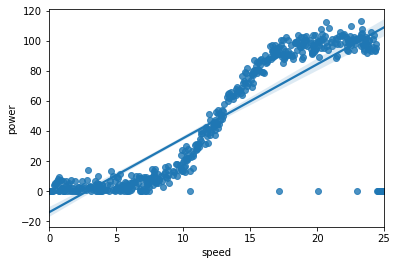

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x=c0,y=c1,data=df)
plt.show()

The straight line doesn't provide a great fit to the data. There is a clear 's' shaped appearance displayed in the plot of the data above. Consider the plots of first order (y = x), second order (y = x^2) and third order polynomials (y = x^3) :

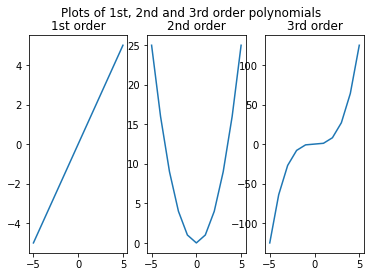

In [90]:
x = [-5,-4,-3,-2,-1,0,1,2,3,4,5]
y1 = [number      for number in x]
y2 = [number ** 2 for number in x] 
y3 = [number ** 3 for number in x]
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Plots of 1st, 2nd and 3rd order polynomials')
ax1.plot(x, y1)
ax1.set_title('1st order')
ax2.plot(x, y2)
ax2.set_title('2nd order')
ax3.plot(x, y3)
ax3.set_title('3rd order')
plt.show()

The straight line is the first order, like the best fit line in the plot above. The shape of the 3rd order plot best fits the plot of the actual data, so we'll try applying a third order polynomial to get a best fit line [3] :   
[3] Fitting different kinds of models; https://seaborn.pydata.org/tutorial/regression.html

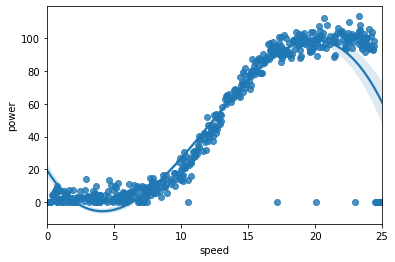

In [65]:
sns.regplot(x=c0,y=c1,data=df, order=3)
plt.show()

This gives a better fit, but there are some power values that don't fit the curve too well at the bottom and top ranges of the speed, and a few in the middle. The top and bottom values are due to there being zero power output at wind speeds below a certain minimum value (the cut-in speed) and above a certain maximum value (the cut-out speed). The cut-in speed is due to there being insufficient torque to overcome friction within the turbine mechanism[1]. The cut-out speed prevents damage to the turbine by ensuring maximum structural loads within drive train components are not exceeded [2] The zero values for power mid-range are unexplained, but are probably due to the turbine(s) being turned off deliberately for routine maintenance or repair, or perhaps if power supply is exceeding demand [3]. For someone using the data a separate analysis of the frequency and duration of these mid-range zero power values would probably be appropriate to conduct. When the user runs this code to get predicted power values, two results will be presented - one that includes the mid-term zero values and one that excludes them - we do not know which is most useful. The cut-in and cut-out values will be displayed to the user, and if they enter wind speeds below or above these respectively the predicted power output will simply be output as 0.
[1] Power curve ; https://www.sciencedirect.com/topics/engineering/power-  coefficient#:~:text=4.7.,are%20specified%20on%20power%20curves.
[2] https://www.windpowerengineering.com/how-turbulent-wind-abuse-wind-turbine-drivetrains/
[3] https://www.quora.com/In-a-field-of-wind-turbines-why-are-there-a-few-that-do-not-move

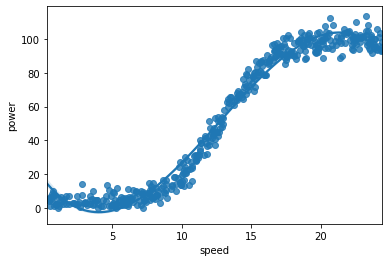

model1 r value -  0.8984832870534454
model2 r value -  0.9783216723216328
model1 prediction for  8  -  [25.11293725]
model2 prediction for  8  -  [11.64228884]


In [91]:
# Polynomial regression ; https://scikit-learn.org/stable/modules/linear_model.html
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
import sklearn.linear_model as lin

def f(x,p):
    return p[0] + x*p[1]

def predict(s):
    return f(s,p)

s = df["speed"].to_numpy()
po = df["power"].to_numpy()

i = 0
ix = []
ix2 = []
minP = 0
maxP = 0
for px in po:
    if px == 0:
        ix.append(i)
    else:
        maxP = s[i]
        maxI = i
        if minP == 0:
            minP = s[i]
            minI = i
    i+=1

for i in ix:
    if i < minI or i > maxI:
       ix2.append(i) 
    
s2   = np.delete(s, ix2)
po2  = np.delete(po, ix2)
df2  = df.drop(ix2,axis=0)

s  = np.delete(s, ix)
po = np.delete(po, ix)
df = df.drop(ix,axis=0)

sns.regplot(x=c0,y=c1,data=df, order=3)
plt.show()
        
s = s.reshape(-1,1)
model1 = lin.LinearRegression()
model2 = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', LinearRegression(fit_intercept=False))])

model1.fit(s,po)
r = model1.score(s,po)
print("model1 r value - ",r)
p = [model1.intercept_ , model1.coef_]

model2.fit(s,po)
r = model2.score(s,po)
print("model2 r value - ",r)

testVal = 8

print("model1 prediction for ",testVal," - ",predict(testVal))

arr = np.array([testVal])
arr = arr.reshape(-1,1)

print("model2 prediction for ",testVal," - ",model2.predict(arr))


In [16]:
print(tr)

[-13.899902630519634, array([4.91759567])]


Note : In order for the model to be of use to the user, information would be required concerning the data provided, and the data source, depending on the nature of the user.  Many factors may influence the values, for example : 

Is the data from one turbine, or many turbines - what type of turbine is it from; if from many, how many, and of what model types and over what geographical area are they spread.
Where and when were the data gathered - turbulence effects may be more common in some locations, or at certain times of the year than others, and may affect power output, as may altitude which affects air density
Where were the power measurements taken relative to the turbine - locally, or at a distance, and where and how was the wind speed measured. If the power mesurements were not local what are the estimated transmission losses.
What instrumentation was used for the measurements, and when and how was it calibrated  
Might other climatic factors affect the results, such as temperature  
What is the data source, eg an academic study, the turbine manufacturer, an oil industry company - political attitudes may cast into question whether the figures are biased eg perhaps taken from a turbine that is known to have a technical problem or to be a particularly efficient or inefficient model.  
If the user of the data is for example a physicist carrying out research into turbines they may also want to know detailed information about all aspects of particular components of the turbine. It should be made clear who the target audience is for the data, so that the appropriate accompanying information can be provided.


Try using a Neural network next for predicting values, and compare with the sklearn model.  


In [1]:
import tensorflow.keras as kr
